In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
data = pd.read_excel("boxplot data.xlsx", sheet_name = None)
data_15 = data.get("1,5")
data_18 = data.get("1,8")
data_48 = data.get("4,8")
data_46 = data.get("4,6")

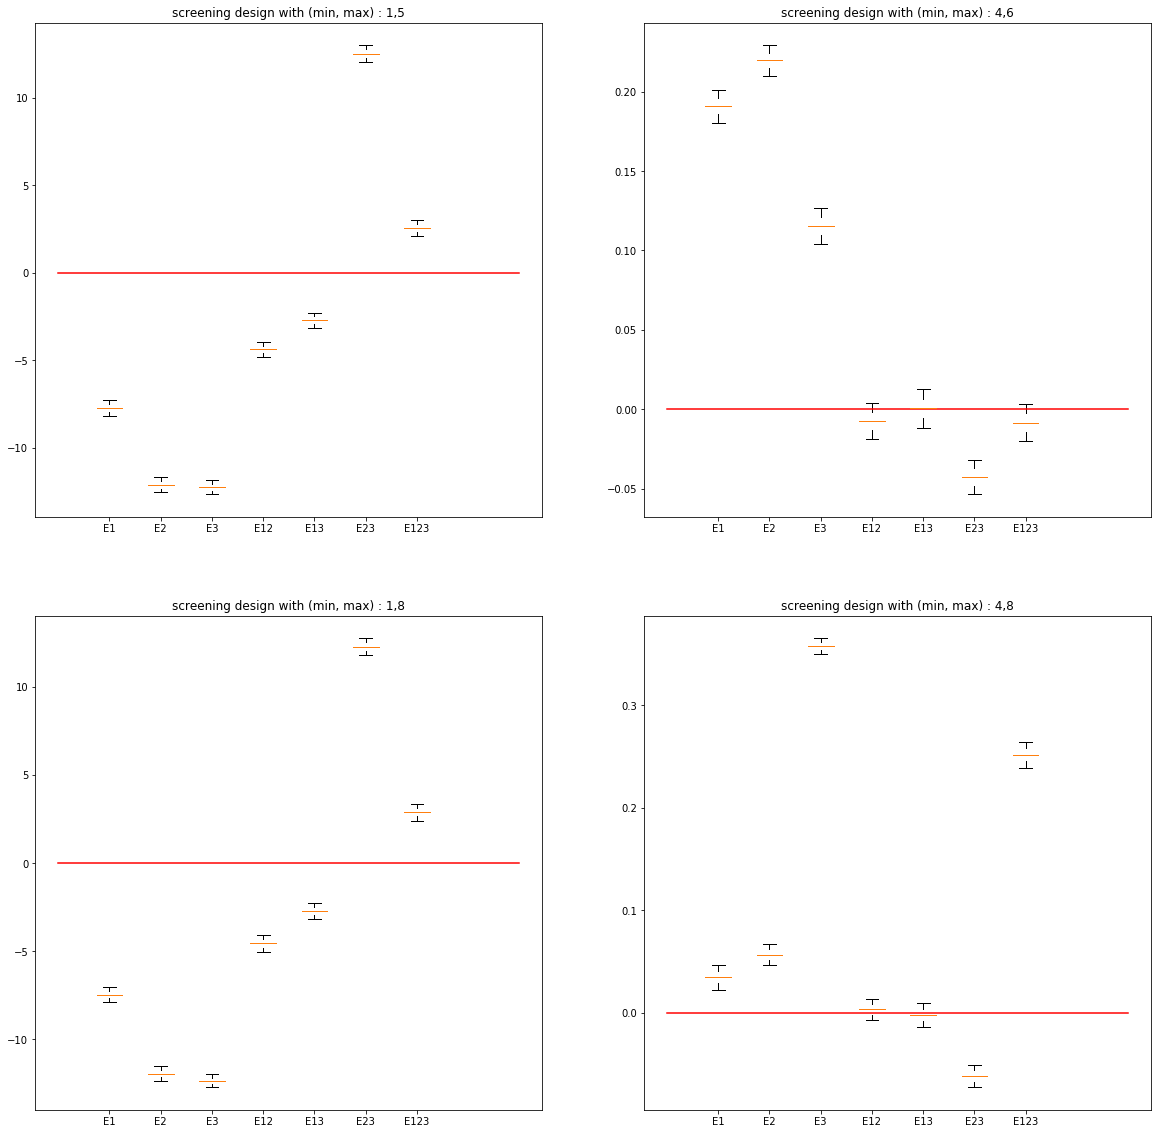

In [7]:
plt.figure(figsize=(20,20))
i = 0
for element in data.items():
    df = element[1]
    key = element[0]
    intervallist = []
    i+=1
    for col in df.columns:
        effect = df[col]
        mu = effect.mean()
        sigma = effect.std()
        k = 1.96


        upbound = mu + k*sigma/np.sqrt(32)
        lowbound = mu - k*sigma/np.sqrt(32)
        # collect difference between sample mean and mu
        intervallist.append([lowbound,mu,upbound])


    # set figure size.
    plt.subplot(2,2,i)
    plt.xlim()
    # plot box plots of each sample mean.
    plt.title('screening design with (min, max) : '+str(key))
    plt.boxplot(intervallist,showbox=False,meanline=False)
    plt.plot([0, 9],[0,0],color='red')
    plt.xticks(range(1,8), labels=df.columns)

# show plot.
plt.savefig("plots/screening_plots.png")
plt.show()